{[Click aquí para ver este documento en Google Colab](https://colab.research.google.com/drive/1iYDqSHT0mnhQKb8hgvoyG2JA6YSjUCCg)}

<head><link rel = "stylesheet" href = "https://drive.google.com/uc?id=1zYOH-_Mb9jOjRbQmghdhsmZ2g6xAwakk"></head>

<table class = "header" width = 100%><tr>
    <th align = "left">CodeSignal, 2020/10/31</th>
    <th align = "right">Por: Gaston Solari Loudet</th>
</tr></table>

### <u>**Imports y ajustes prévios**</u>

In [8]:
import sys, matplotlib.pyplot, numpy
from math import exp, log10 as log
from urllib.request import urlretrieve
URL = "https://drive.google.com/uc?id="
ID = "1qnqKr0jzE-qhqcW43ygq7WWwphOLRA5x"
urlretrieve(URL + ID, "algoCompare.py");
from algoCompare import algoCompare

### [Alternating Sort]()

<center><img width = "40%" src = https://drive.google.com/uc?id=124kQ20ezYLev6gfJ9JQnMQBsa8gHb6k4></img></center>

Se parte de un array "``A``" (como el de arriba), y se busca generar un array "``B``" como el de abajo, con el método secuencial que describen las flechas. Una vez generado "``B``", la función debe devolver "``True``" cuando casualmente este resulta estar ordenado de menor a mayor sin repetir ningún número, o "``False``" en caso contrario.

#### **<u>Forma 1</u>: creando "``B``" previamente**

In [ ]:
def alternatingSort1(X):
    Y, Z = X[::-1].copy(), list()
    for n in range(len(X)//2):
        Z.append(X[n]) ; Z.append(Y[n])
    if (len(X) % 2): Z.append(X[len(X)//2])
    return (Z == sorted(Z))

#### **<u>Forma 2</u>: solo por comparación**

In [ ]:
def alternatingSort2(X):
    N, L, R = len(X), 0, -1
    if (N <= 1): return bool(N)
    while (L < N//2):
        if X[L] > X[R]: return False
        else: L, R = L + 1, R - 1
    if (N % 2 == 0): return True
    if X[L] > X[L + 1]: return True
    return False

### <u><b>Comparación</b></u>

Iteration: 2000 | Next (Log): 0.00 seg

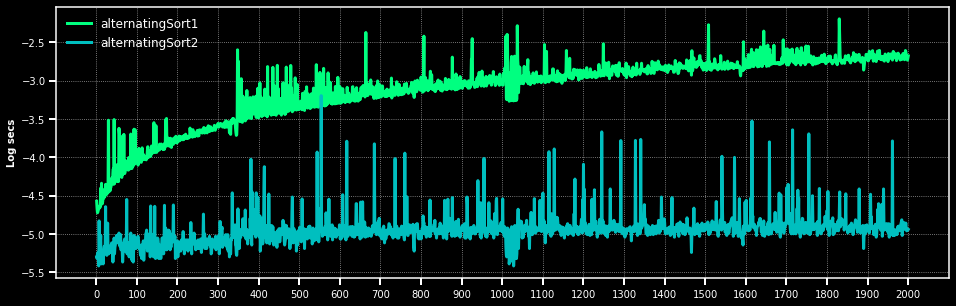

In [ ]:
X = numpy.arange(2000)
numpy.random.shuffle(X)
methods = { "alternatingSort1": lambda x: alternatingSort1(X[: x]),
            "alternatingSort2": lambda x: alternatingSort2(X[: x]) }
algoCompare(methods, span = len(X), logt = True);

### [Reverse strings between parentheses](https://app.codesignal.com/arcade/intro/level-3/9DgaPsE2a7M6M2Hu6)

Dentro de un string, a todo substring que esté entre parentesis, se lo dá vuelta. Se toma a los parentesis como un "operador de inversión", de modo que a un substring con parentesis anidados, se lo da vuelta mas de una vez.
Algunos ejemplos:
* ``reverseInParentheses("``<u>``A B ( C D ) E F ( G H )``</u>``") = "`` <u>``A B D C E F H G``</u>``"``
* ``reverseInParentheses("``<u>``A B ( C D E F ) G H``</u>``") = "`` <u>``A B F E D C G H``</u>``"``
* ``reverseInParentheses("``<u>``A B ( C D ( E F ) ) G H``</u>``") = "`` <u>``A B E F D C G H``</u>``"``
* ``reverseInParentheses("``<u>``( A B ) ( C D ( E F ) G ) H``</u>``") = "`` <u>``B A G E F D C H``</u>``"``

#### **<u>Forma 1</u>: sin recursiones**

In [10]:
def reverseInParentheses1(M):
    while ("(" in M):
        xL = M.rfind("(")
        xR = M.find(")", xL)
        ML, MR = M[: xL], M[xR + 1 :]
        M = ML + M[xR - 1 : xL : -1] + MR
    return M

#### **<u>Forma 2</u>: con recursiones**

In [11]:
def reverseInParentheses2(M):
    for n, cn in enumerate(M):
        if cn != ")": continue
        Mn = M[: n + 1][:: -1]
        for m, cm in enumerate(Mn):
            if cm != "(": continue
            ML = M[: n - m]
            MR = M[n + 1 :]
            Mi = M[n - 1 : n - m : -1]
            return reverseInParentheses2(ML + Mi + MR)
    return M

### <u><b>Comparación</b></u>

Iteration: 500 | Next (Log): 0.07 seg

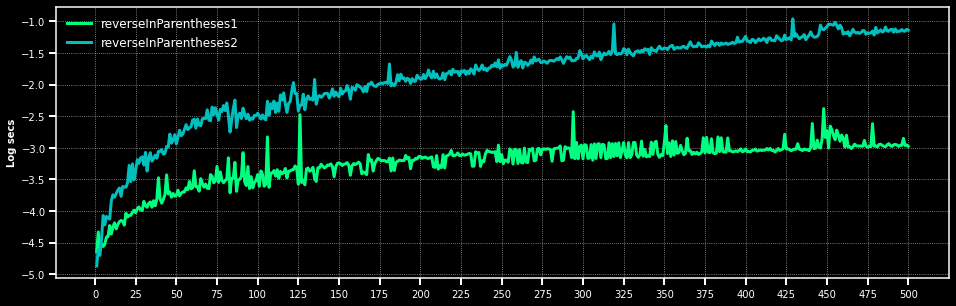

In [16]:
import random
samples = ["abcbca", "(abc)aba", "ac(bbac)", "(ac(c(ba))b)", "b(ca)c(ab)"]
rstr = lambda x: "".join([random.choice(samples) for i in range(x)])
methods = { "reverseInParentheses1": lambda x: reverseInParentheses1(rstr(x)),
            "reverseInParentheses2": lambda x: reverseInParentheses2(rstr(x)) }
algoCompare(methods, span = 500, logt = True);